## Задача
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 
#### Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:

+ научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
+ сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
+ проанализировать основные признаки, наиболее сильно влияющие на отток;
+ сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        1) выделить целевые группы клиентов;
        2) предложить меры по снижению оттока;
        3) определить другие особенности взаимодействия с клиентами.

## Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gym_churn.csv')

## Исследовательский анализ данных (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Первичный обзор данных дал понять, что нулевые значения отстутствуют, данные приведены к нужным типам, аномальных значений тоже не выявлено

In [5]:
clients_no_churn = df.query('Churn <= 0')
clients_churn = df.query('Churn != 0')
churn_info = pd.DataFrame({ 
                                'Среднее значение признаков клиентов в оттоке': clients_churn.mean(),
                               'Среднее значение признаков клиентов не попавших в отток': clients_no_churn.mean()
})
churn_info

,Среднее значение признаков клиентов в оттоке,Среднее значение признаков клиентов не попавших в отток
gender,0.510839,0.510037
Near_Location,0.768143,0.873086
Partner,0.355325,0.534195
Promo_friends,0.183789,0.353522
Phone,0.902922,0.903709
Contract_period,1.728558,5.747193
Group_visits,0.268615,0.464103
Age,26.989632,29.976523
Avg_additional_charges_total,115.082899,158.445715
Month_to_end_contract,1.662582,5.283089


#### По ключевым признакам видно, что в целом у клиентов в оттоке меньшая активность и меньшие доп.затраты.

#### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

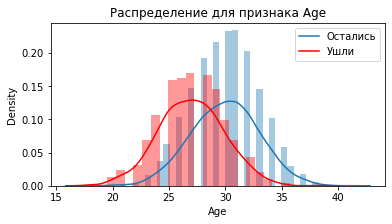

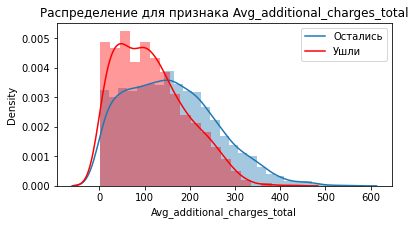

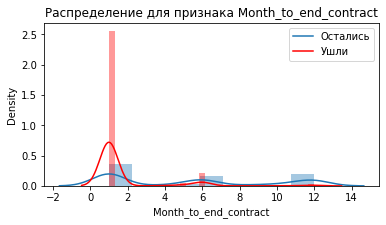

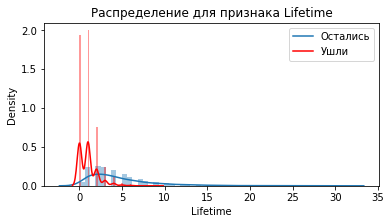

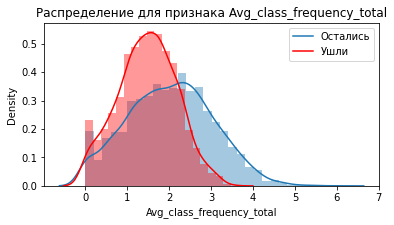

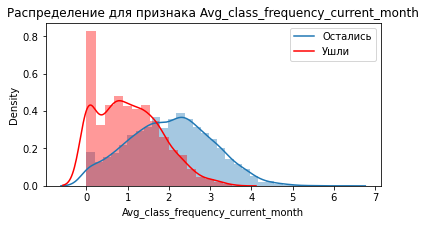

In [6]:
num_feat = df.drop(columns =(['gender', 'Near_Location', 
                              'Partner','Promo_friends', 'Phone',
                              'Group_visits', 'Contract_period', 'Churn'])).columns
for col in num_feat:
    plt.figure(figsize=(6, 3))
    sns.distplot(clients_no_churn[col])
    sns.distplot(clients_churn[col], color = 'r')
    plt.legend(labels = ('Остались', 'Ушли'))
    plt.title('Распределение для признака ' + col)
    plt.show()

+ Молодые уходят чаще, чем взрслые
+  Ушедшие клиенты тратят меньше
+ Клиенты в оттоке, в основном, покупают абономент на один месяц
+ Уходят только новички, если клиент проходил в зал больше 5 ммесяцев, то его уход почти равен нулю
+  Клиенты в оттоке чаще всего посещают зал от 1 до 2 раз в неделю
+  Если клиент ниразу не посетил зал за месяц, то вероятнее всего он больше не вернется, если же посетил зал больше 4-х раз, то вероятнее всего он станет постоянным клиентом



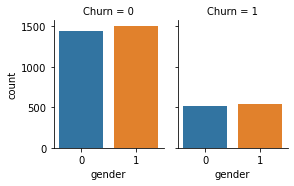

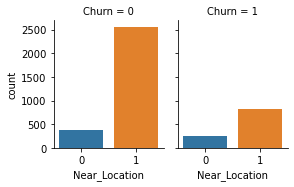

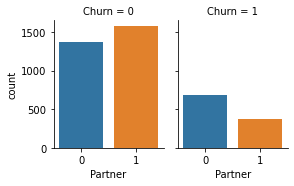

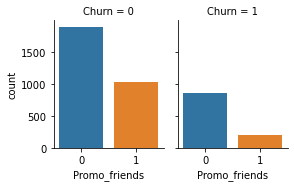

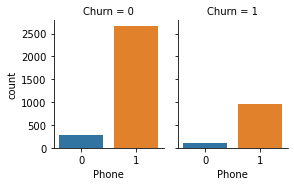

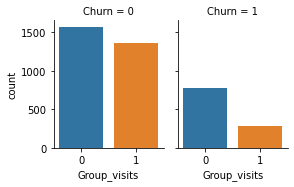

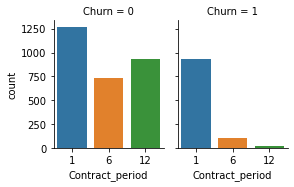

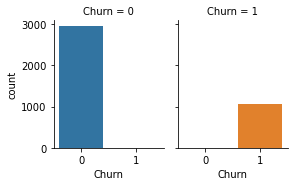

In [7]:
binar_feat = df[['gender', 'Near_Location', 'Partner','Promo_friends', 'Phone', 'Group_visits', 'Contract_period', 'Churn']]
for col in binar_feat.columns:
    sns.catplot(col, col="Churn", data = binar_feat, kind="count", height=2.5, aspect=.8)

Видим, что чаще уходят клиенты которые:

+ Покупают абонемент всего на один месяц
+ Реже посещают групповые занятия
+ Ушедшие клиенты меньше пользуются партнерской программой и от друзей

#### Построим матрицу корреляций


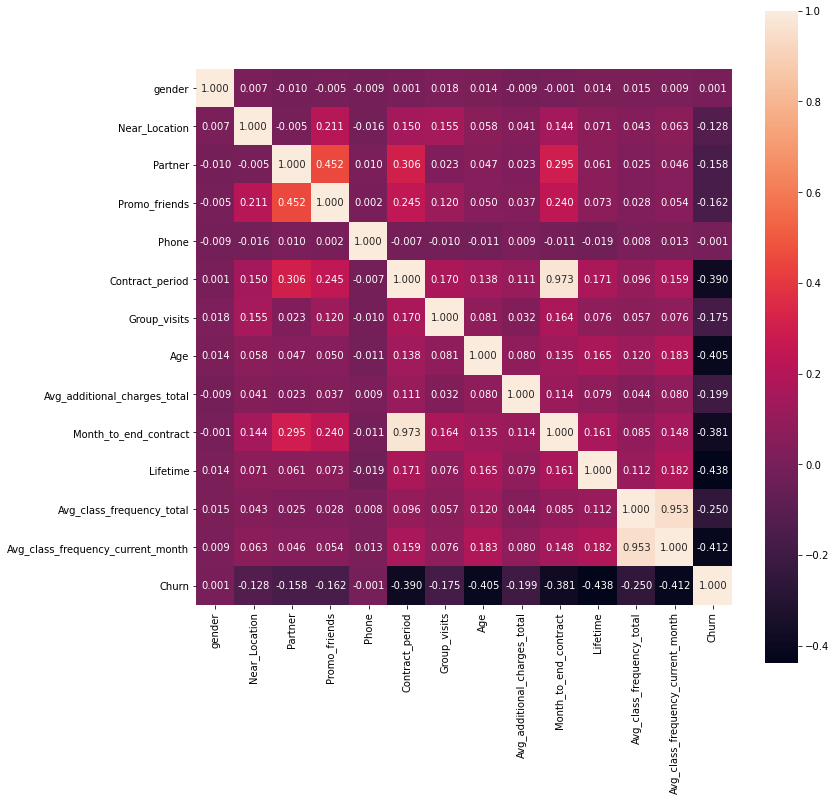

In [8]:
cm = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt = '.3f', square=True)
plt.show()

#### Видно, что сильно коррелируют такие признаки как Month_to_end_contract и Contract_period = 0,97, а так же Avg_class_frequency_current_month и Avg_class_frequency_total = 0,95, что логично так как признакми взаимосвязанны между собой. Выделяется так же зависимость между Promo_friends и Partner, можно предположить, что сотрудники компании партнера клуба чаще обычного приглашают своих друзей.

## Построение модели

In [9]:
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state = 0)

In [10]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [11]:
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.87
	Recall: 0.80
	F1: 0.84
	ROC_AUC: 0.97


In [12]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97


#### В целом модели отличаются не критично, но модель линейной регресси показала себя хуже, чем модель случайного леса. Так же качество обеих моделей очень высокое по 0,97 по ROC_AUC.

In [13]:
# Рассмотрим важность признаков

log_reg = pd.DataFrame({'feature' : X_train.columns, 'coef' : lr_model.coef_[0]})
log_reg.sort_values(by='coef', ascending=True)



,feature,coef
12,Avg_class_frequency_current_month,-4.350147
10,Lifetime,-0.886733
6,Group_visits,-0.735990
3,Promo_friends,-0.625411
5,Contract_period,-0.386308
7,Age,-0.078721
0,gender,-0.018798
8,Avg_additional_charges_total,-0.004748
9,Month_to_end_contract,0.143648
2,Partner,0.161980


In [14]:
# Избавляюсь от сильно коррелирующих признаков
lr_model_test = LogisticRegression(random_state = 0)
X_train_cleared = X_train.drop(['Avg_class_frequency_current_month', 'Month_to_end_contract'], axis=1)
lr_model_test.fit(X_train_cleared, y_train)

log_reg = pd.DataFrame({'feature' : X_train_cleared.columns, 'coef' : lr_model_test.coef_[0]})
log_reg.sort_values(by='coef', ascending=True)



,feature,coef
9,Lifetime,-0.978013
10,Avg_class_frequency_total,-0.639120
1,Near_Location,-0.419761
3,Promo_friends,-0.378886
5,Contract_period,-0.298127
7,Age,-0.287627
6,Group_visits,-0.234361
8,Avg_additional_charges_total,-0.004875
0,gender,0.001038
2,Partner,0.517393


In [15]:
f_m = pd.DataFrame({'feature' : X_train.columns, 'importance' : rf_model.feature_importances_})
f_m.sort_values(by='importance', ascending=False)
# Я выбрал модель случайного леса исходя из значений метрик, буду ориентироваться по ней для формулировки вывода

,feature,importance
10,Lifetime,0.270336
12,Avg_class_frequency_current_month,0.176142
11,Avg_class_frequency_total,0.135955
7,Age,0.121477
8,Avg_additional_charges_total,0.088327
9,Month_to_end_contract,0.072941
5,Contract_period,0.067406
6,Group_visits,0.016090
0,gender,0.012293
2,Partner,0.012099


## Кластеризация клиентов

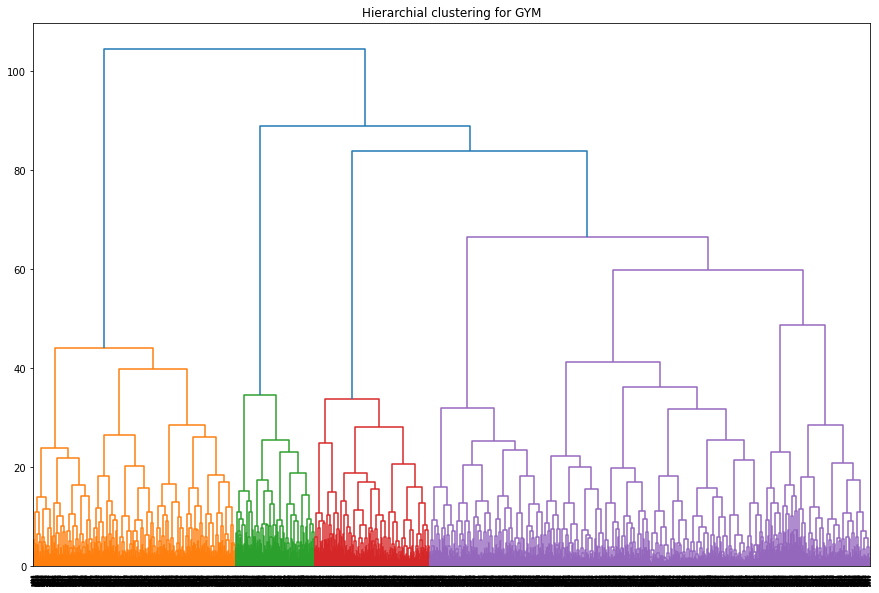

In [16]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

In [17]:
km = KMeans(n_clusters = 4, random_state=0)
labels = km.fit_predict(x_sc)
df_clust_1 = df
df_clust_1['cluster_km'] = labels

In [18]:
df_clust_final = df_clust_1.copy(deep=True)
df_clust_grouped_mean = df_clust_final.groupby('cluster_km').agg('mean')
df_clust_grouped_mean
#Самая высокая доля оттока у 3-го кластера - 56% и 0-го 26%, минимальные значения у 1-го и 2-го кластеров - 9% и 2% (будем считать их надежными).

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.541509,0.866038,0.334906,0.200000,1.0,2.383962,0.450943,29.998113,157.888187,2.221698,4.710377,2.712339,2.698750,0.092453
2,0.503238,0.940796,0.777983,0.573543,1.0,10.690102,0.532840,29.899167,161.051935,9.760407,4.721554,1.993064,1.984827,0.029602
3,0.489477,0.755601,0.386286,0.192804,1.0,1.899525,0.291921,28.044128,129.431049,1.806517,2.227427,1.202154,0.948054,0.562118


In [19]:
non_binary = df.drop(columns =(['gender', 'Near_Location', 
                              'Partner','Promo_friends', 'Phone',
                              'Group_visits', 'Churn', 'cluster_km','Contract_period', 'Month_to_end_contract', 'Lifetime']))
binary = df[['gender', 'Near_Location', 
                              'Partner','Promo_friends', 'Phone',
                              'Group_visits', 'Contract_period', 'Month_to_end_contract', 'Lifetime']]

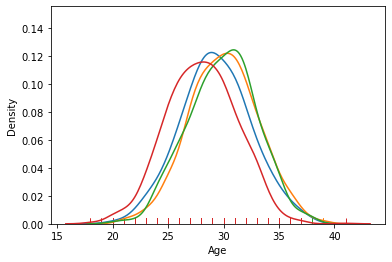

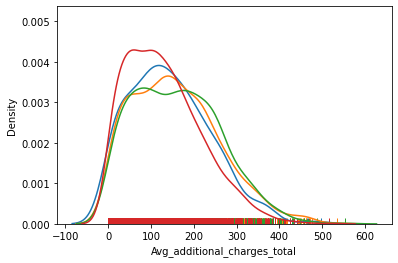

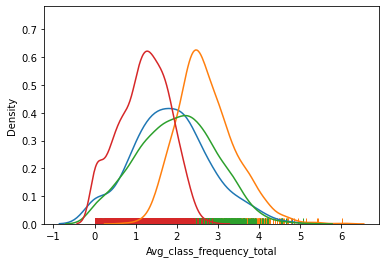

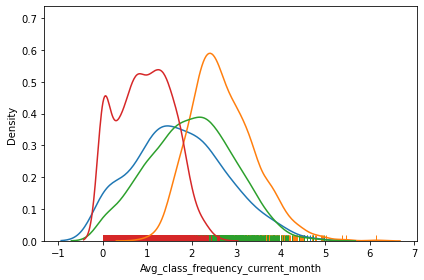

In [20]:
for col in non_binary:
    plt.figure()
    for i in range(0,4):
        sns.distplot(df_clust_1.query('cluster_km == @i')[col],
                    hist=False,
                    rug=True,
                    kde_kws={'label':'Кластер'+ str(i)})
plt.tight_layout()
#синий - 0
#оранжевый - 1
#зеленый - 2
#красный -3

+ Как видно по графику Age больше всего склонны к оттоку молодые ребята, на пике 28 лет(3-й кластер), а надежные кластеры самые возрастные, 0-й кластер на пике 29-30 лет.
+ Что касается доп.затрат - более надежные кластеры имеют более широкий график, большинство клиентов 3-го тратят меньше.
+ Самый активный кластер 1-й, в среднем 3 посещения в неделю. Минимальная активность наблюдается у 3-го кластера, в среднем 1 занятие в неделю. Чем клиент активнее в теченеии недели посещяет зал, тем меньше вероятность его оттока
+ Месячная посещаемость, в целом, схожа с динамикой посещений в неделю



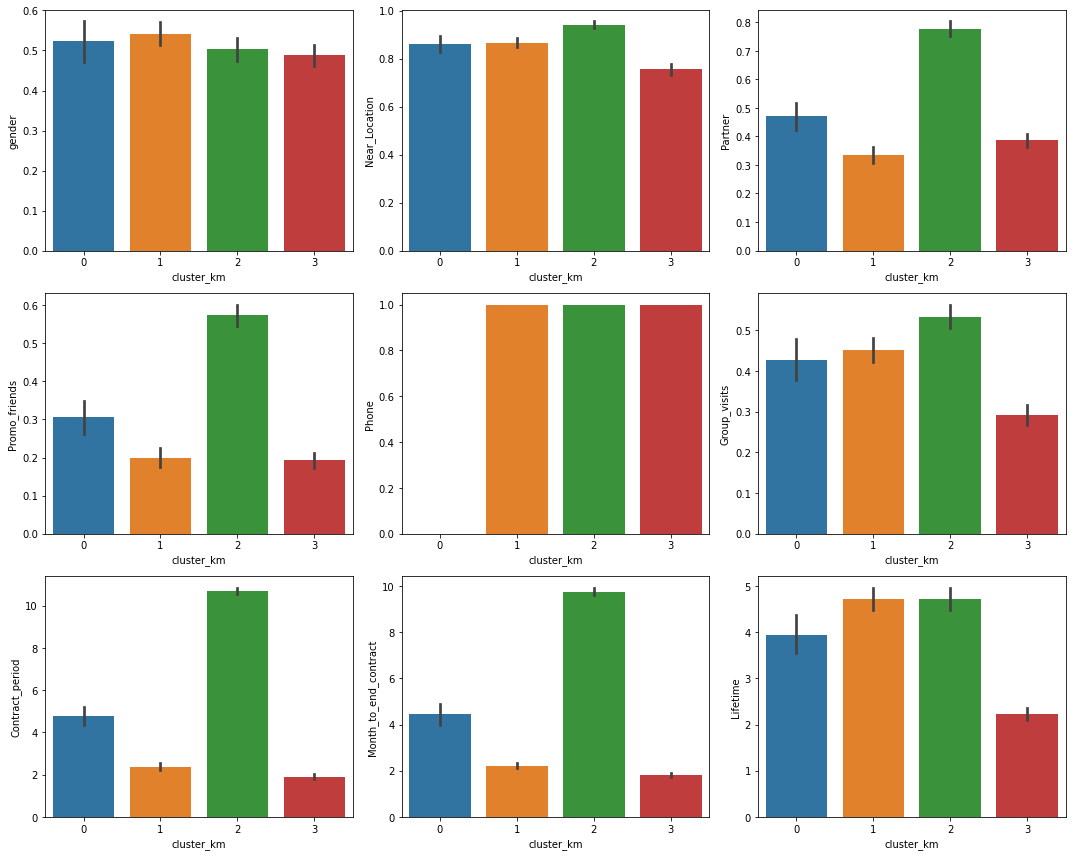

In [21]:
plt.figure(figsize=(15,12))
for i in range(len(binary.columns)):
    plt.subplot(3,3,i+1)
    x = df_clust_1['cluster_km']
    y = binary.iloc[:,i]
    sns.barplot(x=x, y=y)
plt.tight_layout()
plt.show()

+ Очень наглядна динамика Lifetime(время с момента первого посещения), новые клиенты больше всего подвержены к оттоку
+ Динамика Contract_period(длительность текущего абонемента) интересна, так как неясно почему у 1-го и 3-го кластера такая низкая длительность абонемента, возможно клиентам удобнее покупать более короткие абонементы, стоит обратить на это внимание, возможно дело в цене, так как у 2-го кластера в основном все абонементы куплены на год, среднее 10.8 и замечается значимая динамика по признаку Partner, отмечу этот пункт в выводе
+ 0-й кластер не оставил ни одного телефонного номера
+ Активнее всего посещают груповые занятия клиенты в 2-ом кластере, что логично, так как у них самый высокий показатель Partner и Promo_friends, значит у них много знакомых, кто ходит вместе с ними на эти занятия и соотвественно "старички" клуба так же в большинстве ходят на групповые занятия



## Выводы и рекомендации

### Первым делом стоит обратить большее внимание на новых клиентов, так как этот признак самый влиятельный на отток. А так же на то, что их траты на пике выше всех остальных кластеров, именно поэтому для новых клиентов нужно создать акции и дополнительные скидки на первое время, чтобы удержать их. Так же они чаще вего покупают абонеменет на один месяц, наверняка чтобы разведать обстановку, здесь-то и нужно их заинтересовать, возможно нужно предложить только для новых клиентов абономент на 3 месяца + возможность посетить платные занятие бесплатно, так они смогу познакомиться с уже постоянными клиентами, а это очень важно. Так же нужно уделить внимание акции Приведи друга и для новых клиентов, кто купил абонемент, например не на 1 месяц, а на 12, он получит дополнительный абонемент для друга бесплатно. В остальном же постоянные клиенты имеют гиппер минимальную склонность к оттоку, но так же имеют тенденцию покупать абонемент на один месяц, стоить создать программу лояльности, таким образом уменьшится вероятность оттока постоянных клиентов!¶